In [ ]:
void GammaCorrection(Mat srcImg, float gamma) {
　　for (int i = 0; i < srcImg.rows; i++) {
　　　　for (int j = 0; j < srcImg.cols; j++) {
　　　　　　for (int c = 0; c < 3; c++) {
　　　　　　　　float fpixel = (float)(srcImg.at<Vec3b>(i, j)[c]) / 255.0 ;
　　　　　　　　srcImg.at<Vec3b>(i, j)[c] =  saturate_cast<uchar>( pow( fpexel, gamma) * 255.0f );
　　　　　　}
　　　　}
　　}
}

In [ ]:
# import the necessary packages
from __future__ import print_function
import numpy as np
import argparse
import cv2
def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

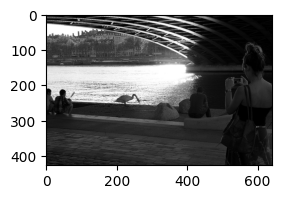

In [ ]:
# import the necessary packages
from __future__ import print_function
import numpy as np
import argparse
import cv2
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os # Import the os module to interact with the file system


from matplotlib import pyplot as plt


def adjust_gamma(image, gamma=3):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 3 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

if __name__ == '__main__':
    # 輸入影像
    img = cv2.imread('/content/000000001268.jpg',0)


    plt.subplot( 121 ),plt.imshow(img, cmap = 'gray')


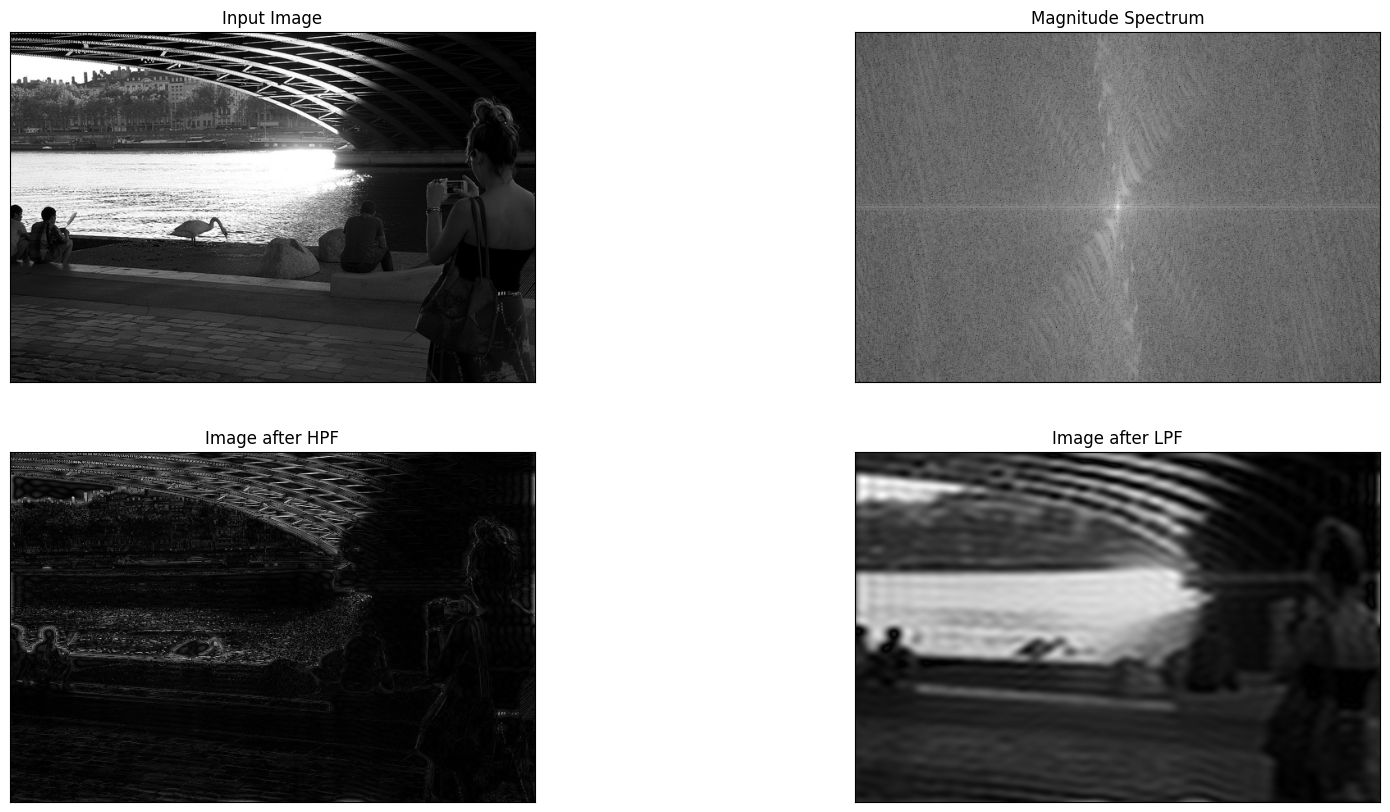

In [ ]:

import numpy as np
import cv2
from matplotlib import pyplot as plt

def HPF_processing(img):
    """
    將原圖過濾低頻部分
    """
    # 用原圖像 長寬 取得 中心座標
    rows, cols = img.shape
    crow,ccol = int(rows/2) , int(cols/2)

    # 以影像中心作為原點，在 X和 Y 軸上往正負各取30個 pixel，也就是一個60*60的正方形遮罩
    # 遮罩的地方直接替換成0，也就把低頻的部分濾掉了
    fshift[crow-30:crow+30, ccol-30:ccol+30] = 0

    # 將低頻率在中心的頻譜圖平移成原本做完 FT 該有的樣子 ( 低頻在左上角 )
    f_ishift = np.fft.ifftshift(fshift)

    # 透過 Inverse Fourier Transform 將 頻率域 轉換回 空間域
    HPF_img_back = np.fft.ifft2(f_ishift)

    # 由於返回的數據中有複數，所以取它的絕對值
    return np.abs(HPF_img_back)

def LPF_processing(img):
    """
    將原圖過濾高頻部分
    """
    dft = cv2.dft(np.float32(img),flags = cv2.DFT_COMPLEX_OUTPUT)
    dft_shift = np.fft.fftshift(dft)

    rows, cols = img.shape
    crow,ccol = int(rows/2) , int(cols/2)

    # 遮罩的地方乘1，也就讓低頻的部分通過(高頻部分都會因為乘上0而被捨棄掉)
    mask = np.zeros((rows,cols,2),np.uint8)
    mask[crow-30:crow+30, ccol-30:ccol+30] = 1

    # 把遮罩應用在頻譜上，過濾高頻的地方
    fshift = dft_shift*mask
    f_ishift = np.fft.ifftshift(fshift)
    LPF_img_back = cv2.idft(f_ishift)

    return cv2.magnitude(LPF_img_back[:,:,0],LPF_img_back[:,:,1])

if __name__ == '__main__':
    # 輸入影像
    img = cv2.imread('/content/000000001268.jpg',0)

    # 轉換為頻率域，output會是二維 array，第一個維度是實部，第二個維度是虛部
    f = np.fft.fft2(img)

    # 頻率最低的地方會左上角，將結果平移至中心，比較好理解
    fshift = np.fft.fftshift(f)

    # 給予X座標(實部)與Y座標(虛部)，轉換為頻譜
    magnitude_spectrum = 20*np.log(np.abs(fshift))

    # 高通濾波器實作
    HPF_img = HPF_processing(img)

    # 低通濾波器實作
    LPF_img = LPF_processing(img)

    # 將 array 畫成圖像
    plt.figure(figsize=(20,10))
    plt.subplot(221),plt.imshow(img, cmap = 'gray')
    plt.title('Input Image'), plt.xticks([]), plt.yticks([])
    plt.subplot(222),plt.imshow(magnitude_spectrum, cmap = 'gray') # 將頻譜畫成圖，方便解讀頻率域資訊
    plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
    plt.subplot(223),plt.imshow(HPF_img, cmap = 'gray')
    plt.title('Image after HPF'), plt.xticks([]), plt.yticks([])
    plt.subplot(224),plt.imshow(LPF_img, cmap = 'gray')
    plt.title('Image after LPF'), plt.xticks([]), plt.yticks([])

    # 儲存圖像
    plt.savefig('./output/Result.png', bbox_inches='tight', dpi=300)

In [ ]:

import numpy as np
import cv2
from matplotlib import pyplot as plt
import os # Import the os module to interact with the file system


from matplotlib import pyplot as plt


def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)
# loop over various values of gamma
for gamma in np.arange(0.0, 3.5, 0.5):
	# ignore when gamma is 1 (there will be no change to the image)
	if gamma == 1:
		continue
	# apply gamma correction and show the images
	gamma = gamma if gamma > 0 else 0.1
	adjusted = adjust_gamma(original, gamma=gamma)
	cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
	cv2.imshow("Images", np.hstack([original, adjusted]))
	cv2.waitKey(0)
    # 輸入影像
    img = cv2.imread('/content/000000001268.jpg',0)


    plt.subplot( 121 ),plt.imshow(img)


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 31)

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os # Import the os module to interact with the file system


from matplotlib import pyplot as plt


def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)
# loop over various values of gamma
for gamma in np.arange(0.0, 3.5, 0.5):
	# ignore when gamma is 1 (there will be no change to the image)
	if gamma == 1:
		continue
	# apply gamma correction and show the images
	gamma = gamma if gamma > 0 else 0.1
	# Need to define 'original' before using it
	adjusted = adjust_gamma(img, gamma=gamma) # Assuming you want to adjust the 'img' you'll read below
	cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
	cv2.imshow("Images", np.hstack([img, adjusted])) # Again, using 'img' here
	cv2.waitKey(0)
# This line was indented too much, causing the error
img = cv2.imread('/content/000000001268.jpg',0)


plt.subplot( 121 ),plt.imshow(img) # Also fixing indentation here

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os # Import the os module to interact with the file system


from matplotlib import pyplot as plt


def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)
# loop over various values of gamma
for gamma in np.arange(0.0, 3.5, 0.5):
	# ignore when gamma is 1 (there will be no change to the image)
	if gamma == 1:
		continue
	# apply gamma correction and show the images
	gamma = gamma if gamma > 0 else 0.1
	# Need to define 'original' before using it
	adjusted = adjust_gamma(img, gamma=gamma) # Assuming you want to adjust the 'img' you'll read below
	cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
	cv2.imshow("Images", np.hstack([img, adjusted])) # Again, using 'img' here
	cv2.waitKey(0)
# This line was indented too much, causing the error
img = cv2.imread('/content/000000001268.jpg',0)


plt.subplot( 121 ),plt.imshow(img) # Also fixing indentation here

DisabledFunctionError: cv2.imshow() is disabled in Colab, because it causes Jupyter sessions
to crash; see https://github.com/jupyter/notebook/issues/3935.
As a substitution, consider using
  from google.colab.patches import cv2_imshow


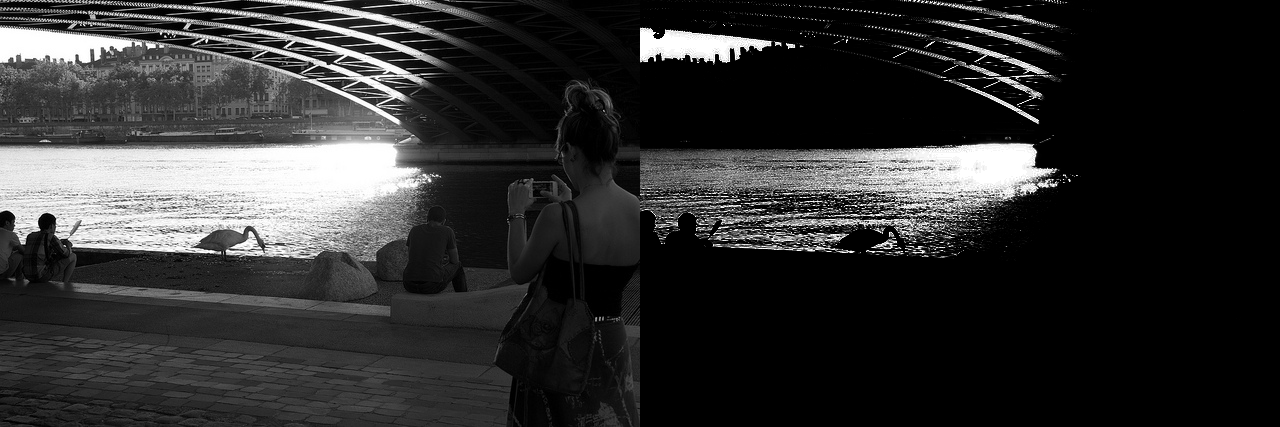

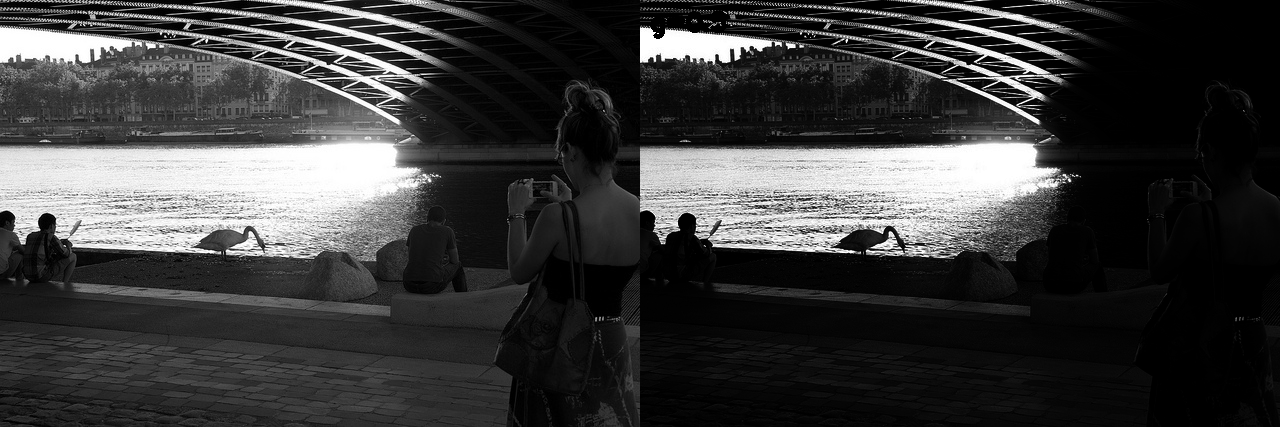

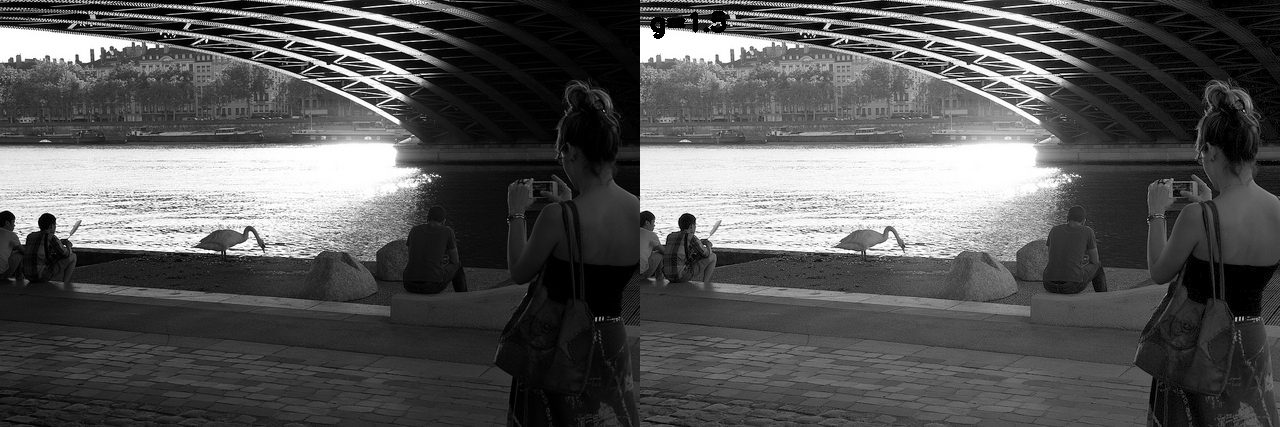

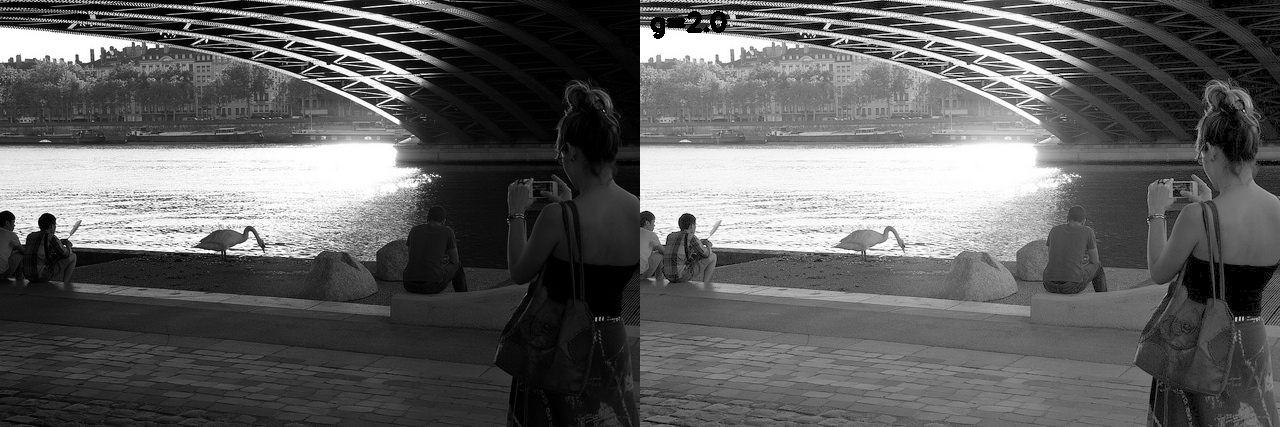

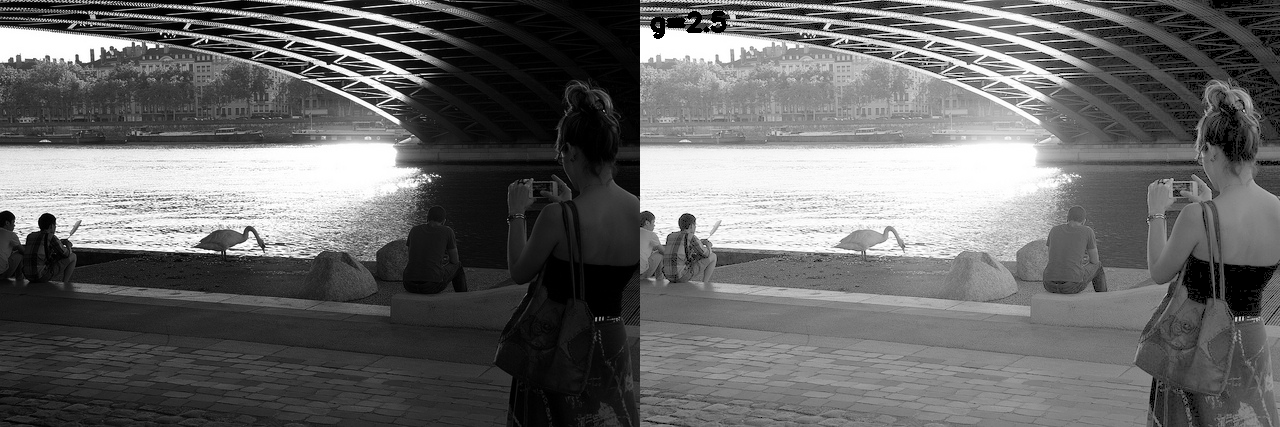

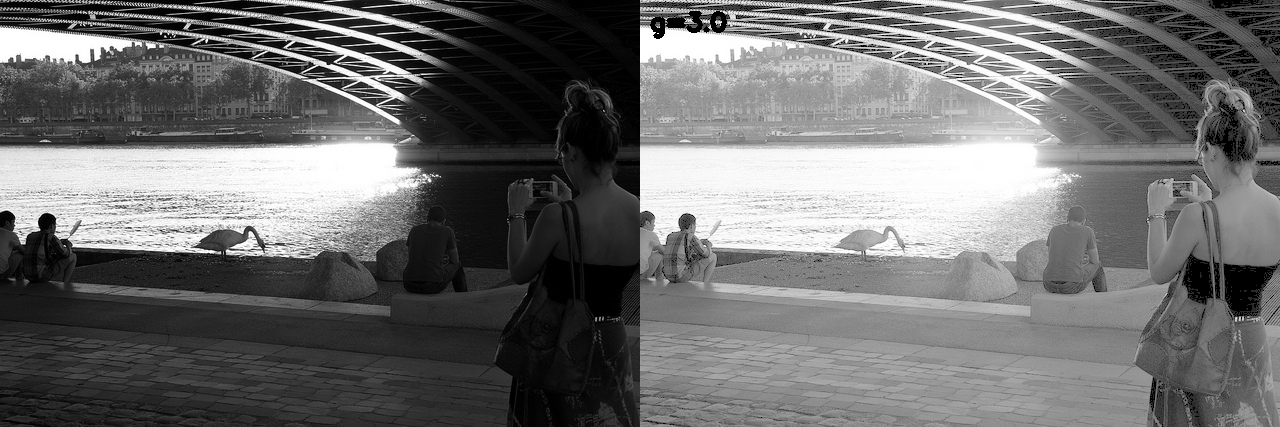

(<Axes: >, <matplotlib.image.AxesImage at 0x7dee702db940>)

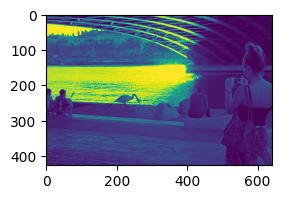

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import os
from google.colab.patches import cv2_imshow # Import the correct function for displaying images in Colab

def adjust_gamma(image, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(image, table)

# loop over various values of gamma
for gamma in np.arange(0.0, 3.5, 0.5):
	# ignore when gamma is 1 (there will be no change to the image)
	if gamma == 1:
		continue
	# apply gamma correction and show the images
	gamma = gamma if gamma > 0 else 0.1
	adjusted = adjust_gamma(img, gamma=gamma)
	cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
	cv2_imshow(np.hstack([img, adjusted])) # Use cv2_imshow instead of cv2.imshow
	cv2.waitKey(0)

img = cv2.imread('/content/000000001268.jpg',0)

plt.subplot( 121 ),plt.imshow(img)